<a href="https://colab.research.google.com/github/hnidey13/tesis_SVD_t-SVDM/blob/main/test_starplus_utils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount Google drive

# https://medium.com/@ashwindesilva/how-to-use-google-colaboratory-to-clone-a-github-repository-e07cf8d3d22b
# https://stackoverflow.com/questions/48350226/methods-for-using-git-with-google-colab

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
# clone the repository one time into your Google Drive
# os.chdir('/content/gdrive/MyDrive/')

# try this first
# !git clone https://github.com/hnidey13/tensor-fmri.git

# if the above does not clone the repo, you will have to create a personal access token
# !git clone https://<personal access token>@github.com/<username>/tensor-fmri.git

os.chdir('/content/gdrive/MyDrive/tensor-fmri')
#!git pull

Mounted at /content/gdrive


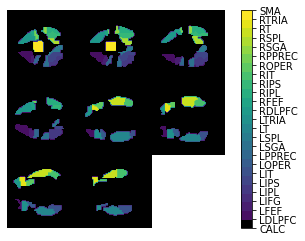

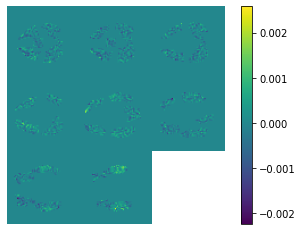

In [ ]:
import numpy as np
from numpy.linalg import norm
import scipy.io
import utils.starplus_utils as starp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import ImageGrid
from utils.plotting_utils import montage_array
import time
from utils.general_utils import rescale

star_plus_data = scipy.io.loadmat('/content/gdrive/MyDrive/Colab (datos)/StarPlus fMRI data/data-starplus-05710-v7.mat')

roi_tensor, my_color_map, names = starp.visualize_roi(star_plus_data)

plt.figure(1)
montage_array(roi_tensor, cmap=my_color_map, names=names)
# plt.savefig('/Users/elizabethnewman/Desktop/brain1.jpg')
plt.show()

tensor_PS, labels = starp.get_labels(star_plus_data)

tensor_PS  = tensor_PS / norm(tensor_PS)
# tensor_PS = rescale(tensor_PS, 1, 64)

plt.figure(2)
montage_array(tensor_PS[:, :, :, 0, 1], cmap='viridis')
plt.show()

In [ ]:
#Funciones para analizar

#def visualize_roi(star_plus_data):
meta = star_plus_data['meta']
num_roi = len(meta['rois'][0][0][0])
dim_x = star_plus_data['meta']['dimx'].item().item()
dim_y = star_plus_data['meta']['dimy'].item().item()
dim_z = star_plus_data['meta']['dimz'].item().item()

roi_tensor = np.zeros([dim_x, dim_y, dim_z])

names = []
for i in range(num_roi):
    coords = meta['rois'][0].item()['coords'][:, i][0]
    x = coords[:, 0] - 1
    y = coords[:, 1] - 1
    z = coords[:, 2] - 1
    roi_tensor[x, y, z] = i
    names.append(meta['rois'][0].item()['name'][0][i][0])

my_color_map = cm.get_cmap('viridis', num_roi)
my_color_map.colors[0] = [0, 0, 0, 1]

#    return roi_tensor, my_color_map, names


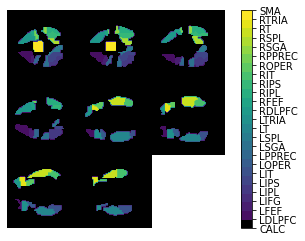

In [ ]:
#def montage_array(A, num_col=None, cmap='viridis', names=None):
    # assume A is a 3D tensor for now
    # images from frontal slices
#A = roi_tensor
#cmap = my_color_map
#names = names
#num_col=None
assert np.ndim(A) == 3, "Montage array only available for third-order tensors"

m1, m2, m3 = A.shape

if num_col is None:
    num_col = np.ceil(np.sqrt(m3)).astype(np.int64)

num_row = np.ceil(m3 / num_col).astype(np.int64)

C = np.zeros([m1 * num_row, m2 * num_col])

k = 0
for p in range(0, C.shape[0], m1):
    for q in range(0, C.shape[1], m2):
        if k >= m3:
            C[p:p + m1, q:q + m2] = np.float64('nan')
            break
        C[p:p + m1, q:q + m2] = A[:, :, k]
        k += 1

img = plt.imshow(C, cmap=cmap)
plt.axis('off')
cb = plt.colorbar()

if names is not None:
    cb.set_ticks(np.arange(0, len(names)))
    cb.set_ticklabels(names)

#    return img

In [ ]:
from utils.starplus_utils import convert_trial_to_tensor

#def get_labels(star_plus_data):
num_trials = star_plus_data['data'].shape[0]
idx = np.arange(num_trials)

info = star_plus_data['info']
trial_cond = idx[(info['cond'] > 1)[0]]
info = info[:, trial_cond]

unique_cond = np.unique(info['cond'])
num_cond = len(unique_cond)

idx = np.arange(len(trial_cond))
labels = np.zeros(len(trial_cond))
labels[idx[(info['firstStimulus'] == 'S')[0]]] = 1
labels = np.kron(labels, np.ones([1, 2]))

for i in range(len(trial_cond)):
    trial_tensor = convert_trial_to_tensor(star_plus_data, trial_cond[i])

    if i == 0:
        tensor_P = trial_tensor[:, :, :, :16, np.newaxis]
        tensor_S = trial_tensor[:, :, :, 16:32, np.newaxis]
    else:
        tensor_P = np.concatenate((tensor_P, trial_tensor[:, :, :, :16, np.newaxis]), axis=4)
        tensor_S = np.concatenate((tensor_S, trial_tensor[:, :, :, 16:32, np.newaxis]), axis=4)

tensor_PS = np.concatenate((tensor_P, tensor_S), axis=4)

#    return tensor_PS, labels.reshape(-1)

In [ ]:
#Estructura de datos

print(type(star_plus_data))
print(len(star_plus_data))
print(star_plus_data.keys())

print(type(star_plus_data['info']))
print(type(star_plus_data['data']))
print(type(star_plus_data['meta']))


<class 'dict'>
6
dict_keys(['__header__', '__version__', '__globals__', 'info', 'data', 'meta'])
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
